# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

### RMSprop

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 194us/step - loss: 14.4452 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 193us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 188us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 10s 193us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 185us/step - loss: 14.5063 - acc: 0.1000 - va

50000/50000 [==============================] - 10s 205us/step - loss: 2.2669 - acc: 0.2157 - val_loss: 1.9645 - val_acc: 0.2847
Epoch 2/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.8828 - acc: 0.3178 - val_loss: 1.7977 - val_acc: 0.35125 - ETA: 0s - loss: 1.8880 - acc
Epoch 3/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7787 - acc: 0.3585 - val_loss: 1.7832 - val_acc: 0.3641
Epoch 4/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.7091 - acc: 0.3867 - val_loss: 1.6972 - val_acc: 0.3794
Epoch 5/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.6509 - acc: 0.4091 - val_loss: 1.6789 - val_acc: 0.3898
Epoch 6/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.6086 - acc: 0.4257 - val_loss: 1.6368 - val_acc: 0.4165
Epoch 7/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.5687 - acc: 0.4409 - val_loss: 1.7857 - val_acc: 0.3785
Epoch 8/5

Epoch 2/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.7882 - acc: 0.3633 - val_loss: 1.7173 - val_acc: 0.3870
Epoch 3/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.7011 - acc: 0.3970 - val_loss: 1.7321 - val_acc: 0.3618
Epoch 4/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.6497 - acc: 0.4182 - val_loss: 1.7442 - val_acc: 0.3662
Epoch 5/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.6090 - acc: 0.4310 - val_loss: 1.7095 - val_acc: 0.3799
Epoch 6/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.5711 - acc: 0.4424 - val_loss: 1.5968 - val_acc: 0.4314
Epoch 7/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5423 - acc: 0.4572 - val_loss: 1.5519 - val_acc: 0.4503
Epoch 8/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.5122 - acc: 0.4659 - val_loss: 1.5631 - val_acc: 0.4470
Epoch 9/50
50000/50000 [======

50000/50000 [==============================] - 8s 153us/step - loss: 1.8696 - acc: 0.3507 - val_loss: 1.8453 - val_acc: 0.3553
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.8235 - acc: 0.3660 - val_loss: 1.8108 - val_acc: 0.3718
Epoch 5/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.7912 - acc: 0.3752 - val_loss: 1.7909 - val_acc: 0.3717
Epoch 6/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.7640 - acc: 0.3841 - val_loss: 1.7589 - val_acc: 0.3886
Epoch 7/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7409 - acc: 0.3932 - val_loss: 1.7432 - val_acc: 0.3856
Epoch 8/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7206 - acc: 0.3999 - val_loss: 1.7235 - val_acc: 0.3942
Epoch 9/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7028 - acc: 0.4054 - val_loss: 1.7026 - val_acc: 0.4089
Epoch 10/50
50000/50000 [===================

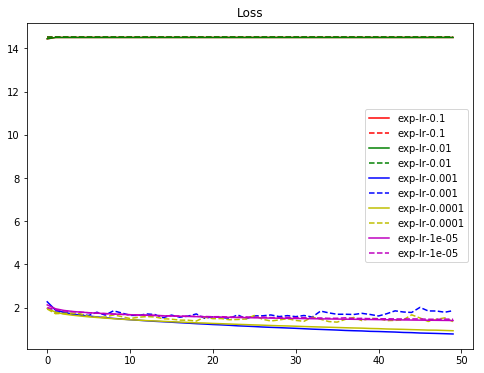

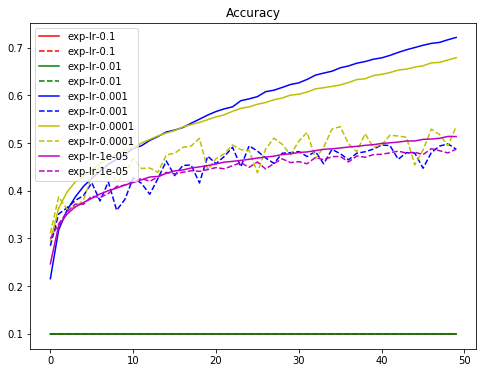

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### Adagrad

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 181us/step - loss: 14.4373 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 173us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 176us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 9s 186us/step - loss: 2.0052 - acc: 0.2841 - val_loss: 1.9097 - val_acc: 0.3009
Epoch 2/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.8046 - acc: 0.3657 - val_loss: 1.8077 - val_acc: 0.3629
Epoch 3/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.7279 - acc: 0.3952 - val_loss: 1.7413 - val_acc: 0.3827
Epoch 4/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.6769 - acc: 0.4138 - val_loss: 1.6907 - val_acc: 0.3985
Epoch 5/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.6396 - acc: 0.4264 - val_loss: 1.6841 - val_acc: 0.4059
Epoch 6/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.6124 - acc: 0.4353 - val_loss: 1.6224 - val_acc: 0.4216
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5891 - acc: 0.4443 - val_loss: 1.6247 - val_acc: 0.4311
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 168us/step - loss: 1.9326 - acc: 0.3265 - val_loss: 1.9081 - val_acc: 0.3374
Epoch 3/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.8875 - acc: 0.3424 - val_loss: 1.8753 - val_acc: 0.3525
Epoch 4/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.8597 - acc: 0.3534 - val_loss: 1.8540 - val_acc: 0.3539
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.8395 - acc: 0.3600 - val_loss: 1.8344 - val_acc: 0.3600
Epoch 6/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.8234 - acc: 0.3665 - val_loss: 1.8205 - val_acc: 0.3688
Epoch 7/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.8103 - acc: 0.3705 - val_loss: 1.8090 - val_acc: 0.3726
Epoch 8/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.7989 - acc: 0.3741 - val_loss: 1.8000 - val_acc: 0.3732
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 10s 199us/step - loss: 2.2132 - acc: 0.2041 - val_loss: 2.2048 - val_acc: 0.2104
Epoch 4/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.1944 - acc: 0.2204 - val_loss: 2.1886 - val_acc: 0.2228
Epoch 5/50
50000/50000 [==============================] - 9s 179us/step - loss: 2.1798 - acc: 0.2289 - val_loss: 2.1756 - val_acc: 0.2311
Epoch 6/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.1678 - acc: 0.2359 - val_loss: 2.1647 - val_acc: 0.2357
Epoch 7/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.1576 - acc: 0.2402 - val_loss: 2.1553 - val_acc: 0.2380
Epoch 8/50
50000/50000 [==============================] - 9s 175us/step - loss: 2.1486 - acc: 0.2437 - val_loss: 2.1468 - val_acc: 0.2437
Epoch 9/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.1405 - acc: 0.2467 - val_loss: 2.1391 - val_acc: 0.2461
Epoch 10/50
50000/50000 [===================

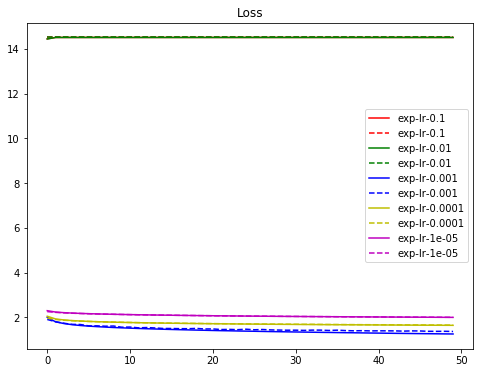

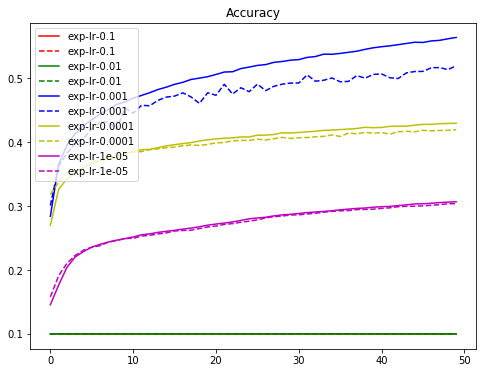

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### Adam

In [20]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 173us/step - loss: 14.4357 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 9s 173us/step - loss: 1.9398 - acc: 0.2966 - val_loss: 1.7737 - val_acc: 0.3557
Epoch 2/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.7014 - acc: 0.3886 - val_loss: 1.6384 - val_acc: 0.4144
Epoch 3/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.6232 - acc: 0.4207 - val_loss: 1.6137 - val_acc: 0.4145
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.5510 - acc: 0.4457 - val_loss: 1.5572 - val_acc: 0.4447
Epoch 5/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.5112 - acc: 0.4629 - val_loss: 1.5215 - val_acc: 0.4608
Epoch 6/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.4760 - acc: 0.4753 - val_loss: 1.4888 - val_acc: 0.4692
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.4366 - acc: 0.4866 - val_loss: 1.5145 - val_acc: 0.4551
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 166us/step - loss: 1.7173 - acc: 0.3944 - val_loss: 1.6657 - val_acc: 0.4170
Epoch 3/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.6299 - acc: 0.4265 - val_loss: 1.6001 - val_acc: 0.4382
Epoch 4/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.5743 - acc: 0.4468 - val_loss: 1.5608 - val_acc: 0.4490
Epoch 5/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.5323 - acc: 0.4614 - val_loss: 1.5322 - val_acc: 0.4573
Epoch 6/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.4926 - acc: 0.4756 - val_loss: 1.5174 - val_acc: 0.4639
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.4644 - acc: 0.4863 - val_loss: 1.4698 - val_acc: 0.4786
Epoch 8/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.4340 - acc: 0.4962 - val_loss: 1.4595 - val_acc: 0.4818
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 9s 174us/step - loss: 1.8632 - acc: 0.3501 - val_loss: 1.8358 - val_acc: 0.3579
Epoch 4/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.8165 - acc: 0.3699 - val_loss: 1.7962 - val_acc: 0.3746
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.7808 - acc: 0.3817 - val_loss: 1.7628 - val_acc: 0.3886
Epoch 6/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.7507 - acc: 0.3935 - val_loss: 1.7371 - val_acc: 0.3946
Epoch 7/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.7252 - acc: 0.4030 - val_loss: 1.7147 - val_acc: 0.4044
Epoch 8/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.7024 - acc: 0.4095 - val_loss: 1.6957 - val_acc: 0.4075
Epoch 9/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6833 - acc: 0.4162 - val_loss: 1.6754 - val_acc: 0.4137
Epoch 10/50
50000/50000 [====================

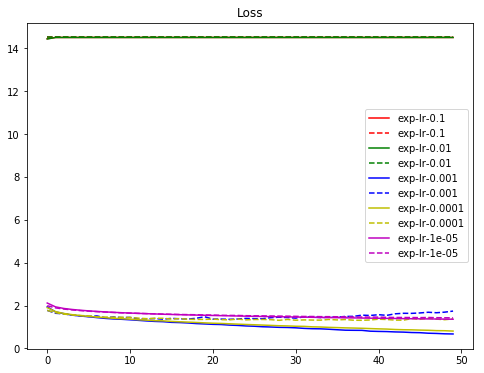

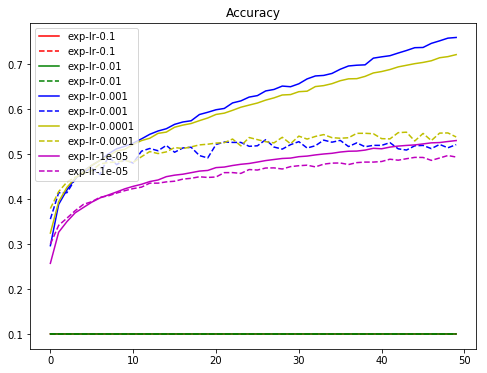

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()